In [1]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'


In [3]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [4]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [5]:
# survey responses
X = ['Комфортные условия труда', '\nСоциальный пакет', 
     'Компания делает мир лучше', 'Профессиональный рост',
     'Современные технологии', '\nИнтересные задачи', 'Отношения с коллегами',
     '\nКарьерный рост', 'Адекватная зарплата', 'Связь с топ-менеджментом',
     '\nПризнание результатов труда', 'Грамотность менеджмента']
Y = [4.6, 3.8, 4.7, 4.7, 4.7, 4.7, 4.8, 4.6, 4.5, 4.6, 4.6, 4.3]
Z = [4.8, 4.8, 4.7, 4.5, 4.4, 4.4, 4.3, 4.3, 3.9, 3.8, 3.8, 3.7]

Text(-0.18,3.55,'По данным портала "Мой круг" на YYYY-MM-DD. SMALL - усреднённая оценка 11 компаний\nс 10-100 сотрудниками. В опросе участвовало XX сотрудников компании Яндекс.')

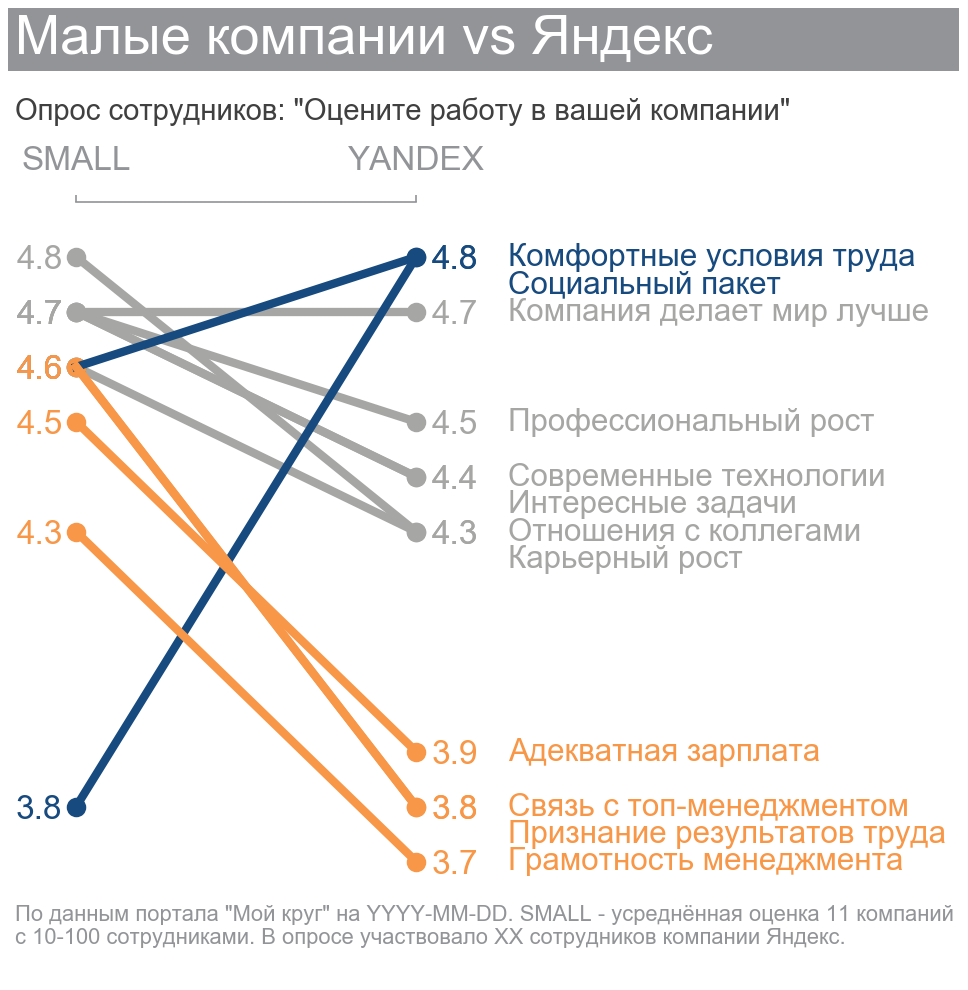

In [6]:
fig, ax1 = plt.subplots(figsize=(7, 9), dpi=150)
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

ax2 = ax1.twinx()
ax2.set_ylim([3.5, 4.9])
ax1.set_ylim([3.5, 4.9])

C = [BLUE1, BLUE1, GRAY8, GRAY8, GRAY8, GRAY8, GRAY8, GRAY8, 
     ORANGE1, ORANGE1, ORANGE1, ORANGE1]

for i in range(len(X)):
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    if C[i] == GRAY8:
        ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4, zorder=0)
    else:
        ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    plt.text(1.27, Z[i], X[i], fontsize=15, linespacing=2.1, color=C[i], verticalalignment='center')

plt.setp(ax1,
         xticks=[0, 1],
         xticklabels=['SMALL', 'YANDEX'],
         yticks=Y,
         yticklabels=Y)
plt.setp(ax2,
         yticks=Z,
         yticklabels=Z)
ax1.tick_params(top=True, bottom=False, left=False, right=False,
                labelbottom=False, labeltop=True)
ax2.tick_params(top=True, bottom=False, left=False, right=False)


# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

for item in ax1.get_xticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    offset = transforms.ScaledTranslation(0, +0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change x ticks color
ax1.tick_params(axis='x', colors=GRAY7)
# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['top'].set_visible(True)
ax1.spines['top'].set_bounds(0, 1)
ax1.spines['top'].set_color(GRAY7)

# add survey question
plt.text(-0.18, 5.17, 'Малые компании vs Яндекс'+' '*16, fontsize=26, 
         color='white',
         bbox={'facecolor': GRAY7,
               'pad': 3,
               'edgecolor': 'none'}) 
plt.text(-0.18, 5.05, 'Опрос сотрудников: "Оцените работу в вашей компании"', fontsize=14, 
         color=GRAY2)
# add footnote with the data source
plt.text(-0.18, 3.55,
         'По данным портала "Мой круг" на YYYY-MM-DD. '
         'SMALL - усреднённая оценка 11 компаний\nс 10-100 '
         'сотрудниками. В опросе участвовало XX сотрудников '
         'компании Яндекс.',
         fontsize=10.5,
         color=GRAY7)

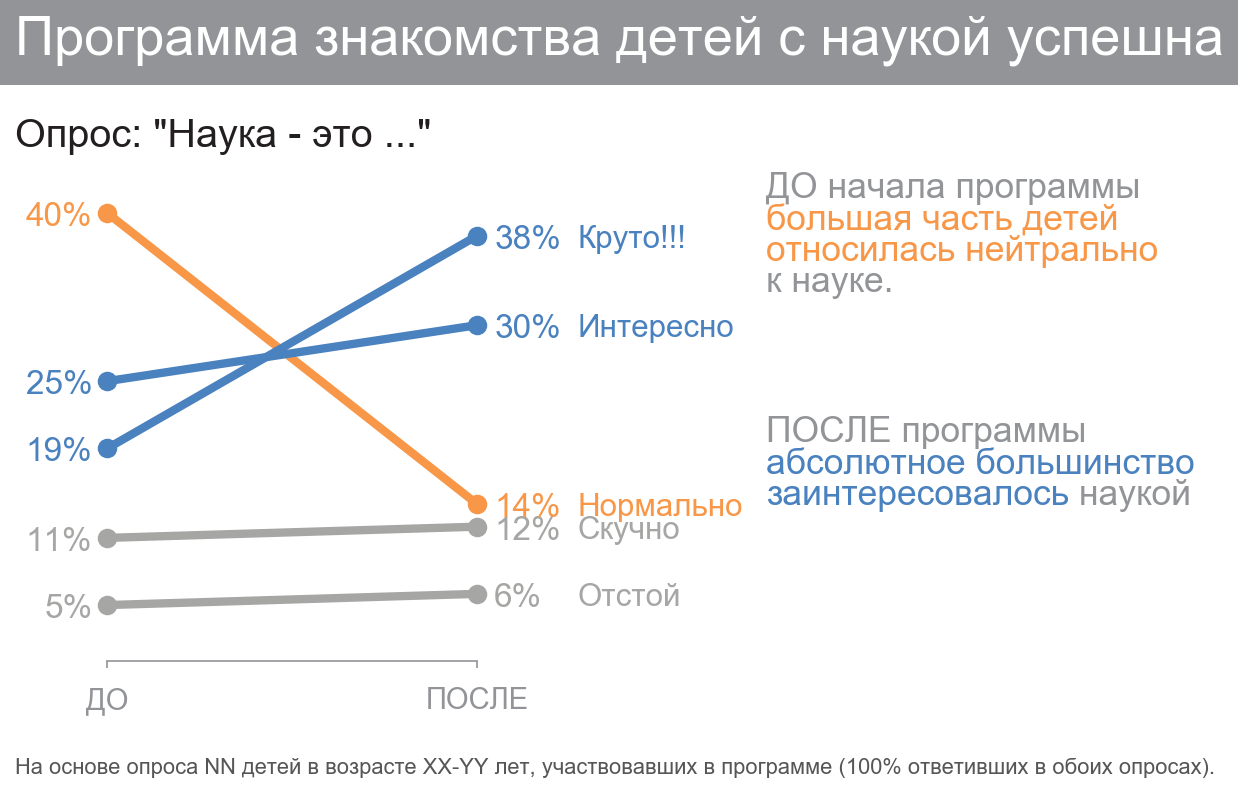

In [7]:
# survey responses
X = ['Скучно', 'Отстой', 'Нормально', 'Интересно', 'Круто!!!']
Y = [11, 5, 40, 25, 19]
Z = [12, 6, 14, 30, 38]

fig, ax1 = plt.subplots(figsize=(7.6, 5.5), dpi=150)
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)
ax2 = ax1.twinx()
ax2.set_ylim([0, 42])
ax1.set_ylim([0, 42])
C = [GRAY8, GRAY8, ORANGE1, BLUE2, BLUE2]
for i in range(5):
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    plt.text(1.27,
             Z[i] - 1,
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

ax1.tick_params(left=False)
ax2.tick_params(right=False)
plt.setp(ax1,
         xticks=[0, 1],
         xticklabels=['ДО', 'ПОСЛЕ'],
         yticks=Y,
         yticklabels=[str(v) + '%' for v in Y])

plt.setp(ax2,
         yticks=Z,
         yticklabels=[str(v) + '%' for v in Z])

for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

ax1.tick_params(axis='x', colors=GRAY7)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

plt.text(-0.25, 54.3,
         'Программа знакомства детей с наукой успешна',
         fontsize=26,
         color='white',
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

plt.text(-0.25, 46, 'Опрос: "Наука - это ..."', fontsize=19, 
         color=GRAY1)

plt.text(-0.25, -10,
         'На основе опроса NN детей в возрасте XX-YY лет, '
         'участвовавших в программе '
         '(100% ответивших в обоих опросах).',
         fontsize=10.5,
         color=GRAY3)

rainbow_text(1.78, 33,
             'ДО начала программы\n'
             'большая часть детей\n'
             'относилась нейтрально\nк науке.',
             [[GRAY7], [ORANGE1], [ORANGE1], [GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

rainbow_text(1.78, 14,
             'ПОСЛЕ программы\n'
             'абсолютное большинство\n'
             'заинтересовалось|| наукой',
             [[GRAY7], [BLUE2], [BLUE2, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

In [8]:
X = list(reversed(['Сегмент A', 'Сегмент B', 'Сегмент C', 'Сегмент D']))
Y = list(reversed([5, 35, 30, 30]))

Text(16,-1.1,'_________________\n                Всего 100%')

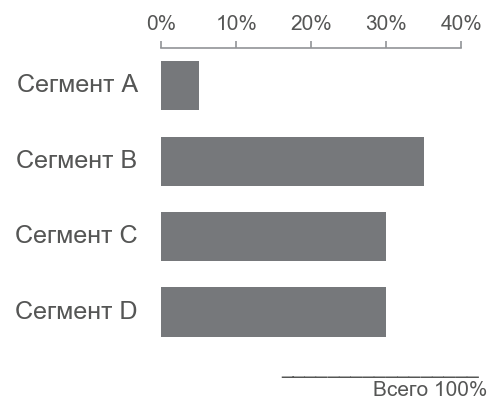

In [9]:
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=150)
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)
ax1.barh(range(len(X)), Y, height=0.65, color=[GRAY5]*4)
ax1.set_xlim([0, 40])
ax1.set_ylim([-0.5, 3.5])
plt.setp(ax1,
         xticks=[0, 10, 20, 30, 40],
         xticklabels=['0%', '10%', '20%', '30%', '40%'],
         yticks=np.arange(len(X)),
         yticklabels=X)
ax1.tick_params(top='on', bottom='off', left='off', 
                labelbottom='off', labeltop='on')
for item in ax1.get_xticklabels():
    item.set_color(GRAY3)
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    item.set_color(GRAY3)
    # use trasformations to shift y tick labels
    # left y labels slightly right, and right labels slightly left
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
ax1.tick_params(color=GRAY7)
ax1.spines['top'].set_color(GRAY7)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.text(16, -1.1,
         '_________________\n                Всего 100%',
         fontsize=10,
         color=GRAY3)

Text(-0.15,0.14,'По данным статьи Е. Донец "Опыт исследования студенческих отчислений\nна примере МГУ", 2011. 7,224 студента 1998–2001 гг. поступления.')

C:\Python64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


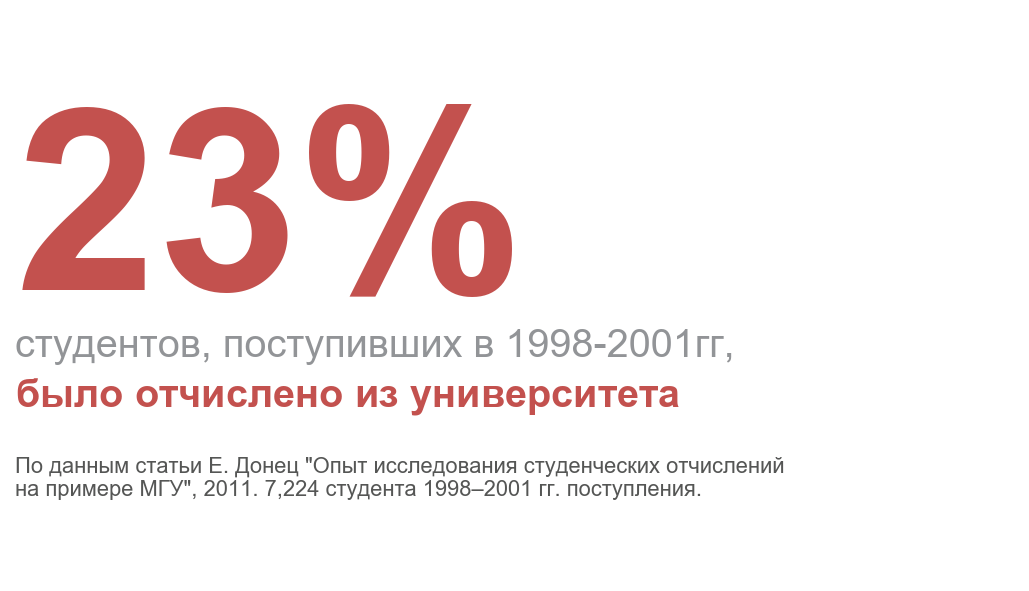

In [10]:
plt.figure(figsize=(7.45, 4.9), dpi=150)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
plt.text(-0.15, 0.51, '$\\bf{23\%}$', fontsize=122, color=RED1)
plt.text(-0.15, 0.39,
         'студентов, поступивших в 1998-2001гг,',
         fontsize=19,
         color=GRAY7)
plt.text(-0.15, 0.30,
         '$\\bf{было\ отчислено\ из\ университета}$',
         fontsize=19,
         color=RED1)
plt.text(-0.15, 0.14,
         'По данным статьи Е. Донец "Опыт исследования студенческих отчислений\nна примере МГУ", 2011. '
         '7,224 студента 1998–2001 гг. поступления.',
         fontsize=10.5,
         color=GRAY3)

In [11]:
from matplotlib.pyplot import Rectangle

X1 = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
      'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
X2 = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
      'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
Y = [160, 180, 250, 140, 175, 150, 125, 156, 126, 104, 124, 140]
Z = [160, 180, 255, 140, 175, 160, 135, 202, 160, 139, 149, 177]

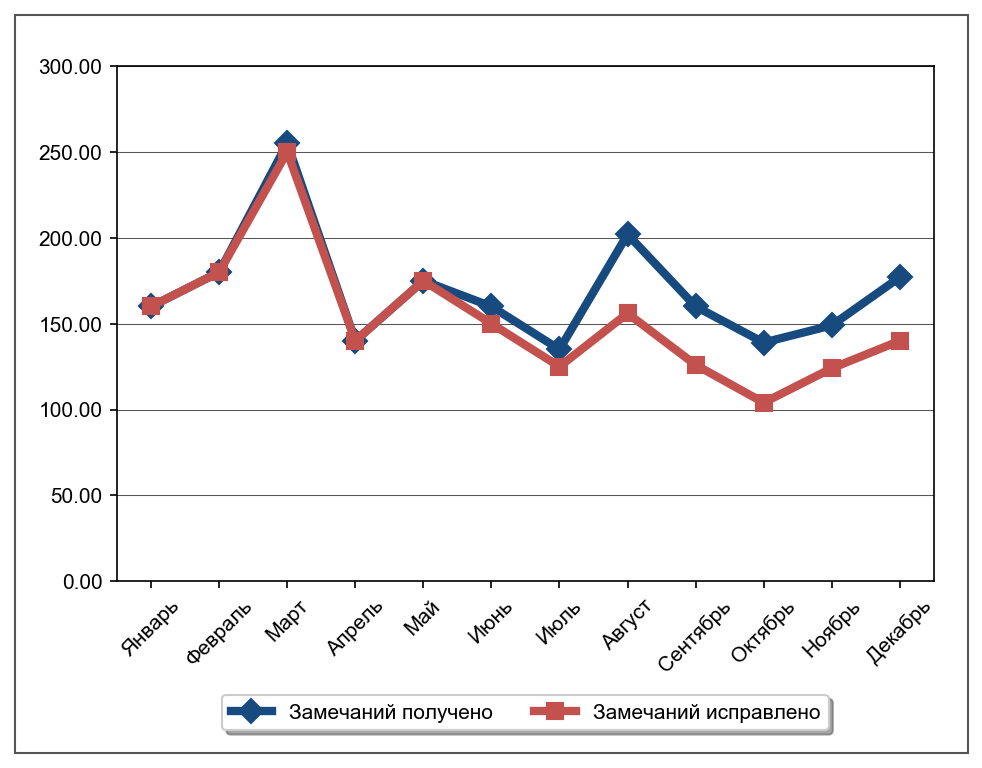

In [12]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, 'D-', linewidth=4, color=BLUE1, markersize=8, label='Замечаний получено')
ax1.plot(range(12), Y, 's-', linewidth=4, color=RED1, markersize=8, label='Замечаний исправлено')
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X2,
         yticks=list(range(0, 350, 50)),
         yticklabels=['0.00', '50.00', '100.00', '150.00',
                      '200.00', '250.00', '300.00'])
plt.xticks(rotation=45)
plt.grid(color=GRAY3, linestyle='-', linewidth=0.5, axis='y')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
autoAxis = ax1.axis()
rec = Rectangle((autoAxis[0]-1.5,autoAxis[2]-100),(autoAxis[1]-autoAxis[0])+2,(autoAxis[3]-autoAxis[2])+130,fill=False,lw=1, color=GRAY3)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)
pass

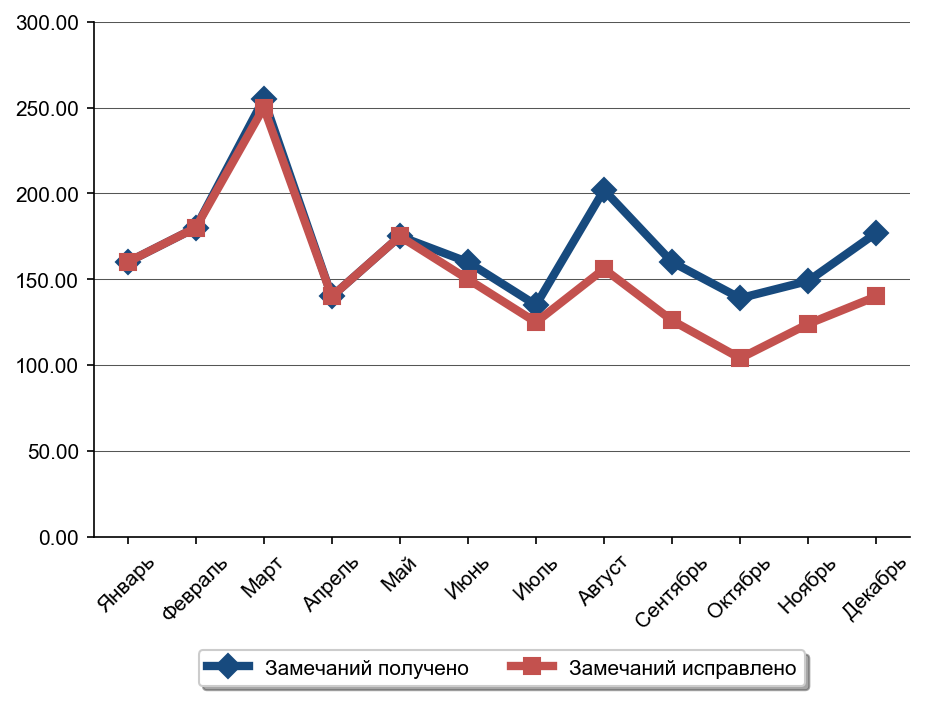

In [13]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, 'D-', linewidth=4, color=BLUE1, markersize=8, label='Замечаний получено')
ax1.plot(range(12), Y, 's-', linewidth=4, color=RED1, markersize=8, label='Замечаний исправлено')
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X2,
         yticks=list(range(0, 350, 50)),
         yticklabels=['0.00', '50.00', '100.00', '150.00',
                      '200.00', '250.00', '300.00'])
plt.xticks(rotation=45)
plt.grid(color=GRAY3, linestyle='-', linewidth=0.5, axis='y')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
pass

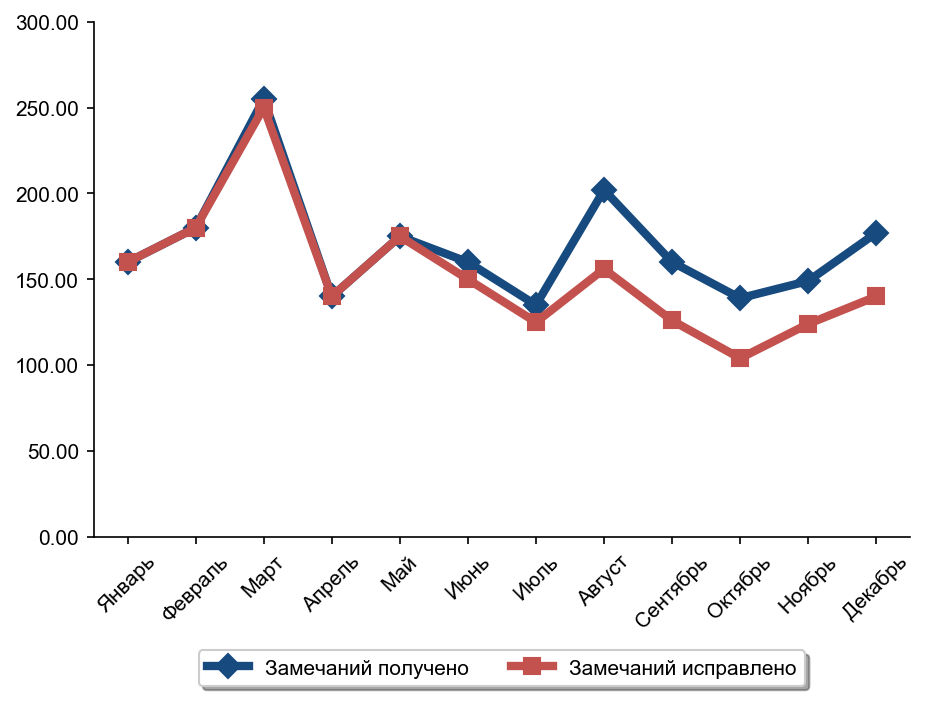

In [14]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, 'D-', linewidth=4, color=BLUE1, markersize=8, label='Замечаний получено')
ax1.plot(range(12), Y, 's-', linewidth=4, color=RED1, markersize=8, label='Замечаний исправлено')
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X2,
         yticks=list(range(0, 350, 50)),
         yticklabels=['0.00', '50.00', '100.00', '150.00',
                      '200.00', '250.00', '300.00'])
plt.xticks(rotation=45)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
pass

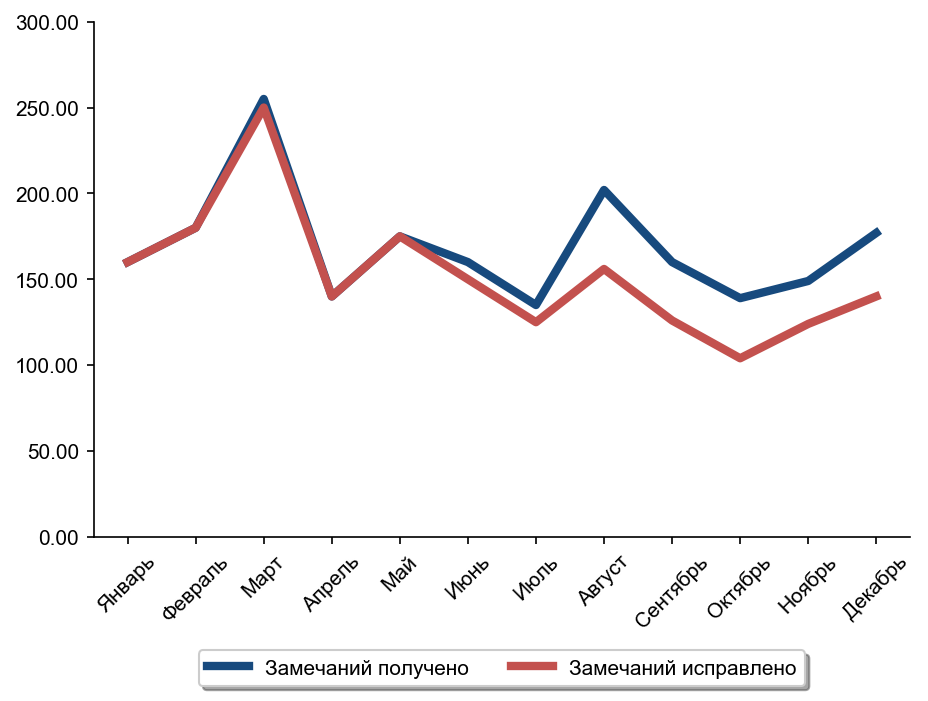

In [15]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, linewidth=4, color=BLUE1, label='Замечаний получено')
ax1.plot(range(12), Y, linewidth=4, color=RED1, label='Замечаний исправлено')
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X2,
         yticks=list(range(0, 350, 50)),
         yticklabels=['0.00', '50.00', '100.00', '150.00',
                      '200.00', '250.00', '300.00'])
plt.xticks(rotation=45)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
pass

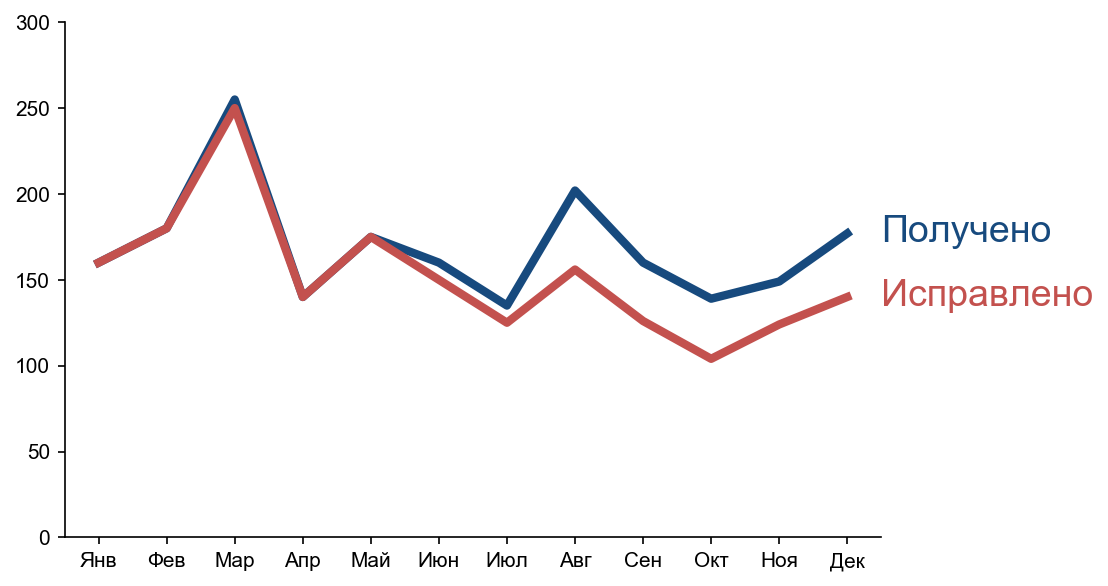

In [16]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, linewidth=4, color=BLUE1)
ax1.plot(range(12), Y, linewidth=4, color=RED1)
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X1,
         yticks=list(range(0, 350, 50)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(11.5, 172, 'Получено', fontsize=18, color=BLUE1)
ax1.text(11.5, 135, 'Исправлено', fontsize=18, color=RED1)
pass

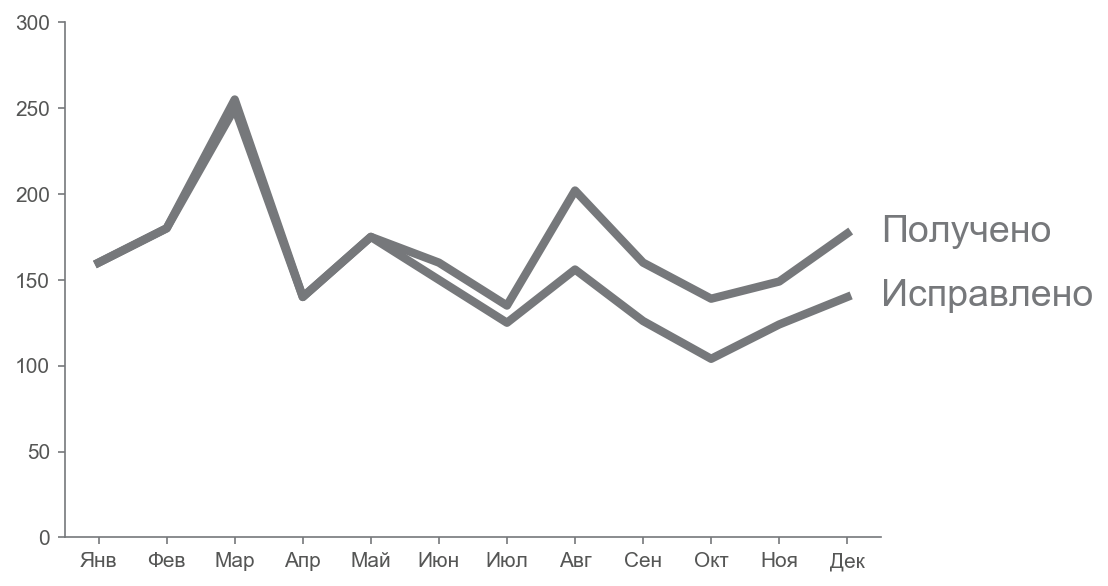

In [17]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, linewidth=4, color=GRAY5)
ax1.plot(range(12), Y, linewidth=4, color=GRAY5)
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X1,
         yticks=list(range(0, 350, 50)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(11.5, 172, 'Получено', fontsize=18, color=GRAY5)
ax1.text(11.5, 135, 'Исправлено', fontsize=18, color=GRAY5)
ax1.tick_params(color=GRAY5)
ax1.spines['left'].set_color(GRAY5)
ax1.spines['bottom'].set_color(GRAY5)
for item in ax1.get_xticklabels():
    item.set_color(GRAY3)
for item in ax1.get_yticklabels():
    item.set_color(GRAY3)
pass

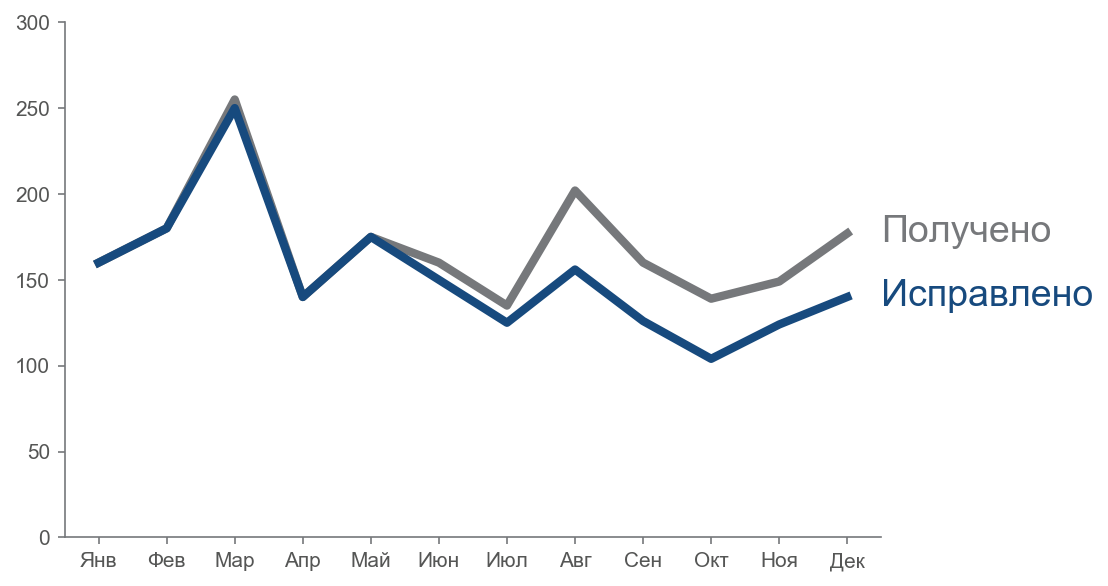

In [18]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, linewidth=4, color=GRAY5)
ax1.plot(range(12), Y, linewidth=4, color=BLUE1)
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X1,
         yticks=list(range(0, 350, 50)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(11.5, 172, 'Получено', fontsize=18, color=GRAY5)
ax1.text(11.5, 135, 'Исправлено', fontsize=18, color=BLUE1)
ax1.tick_params(color=GRAY5)
ax1.spines['left'].set_color(GRAY5)
ax1.spines['bottom'].set_color(GRAY5)
for item in ax1.get_xticklabels():
    item.set_color(GRAY3)
for item in ax1.get_yticklabels():
    item.set_color(GRAY3)
pass

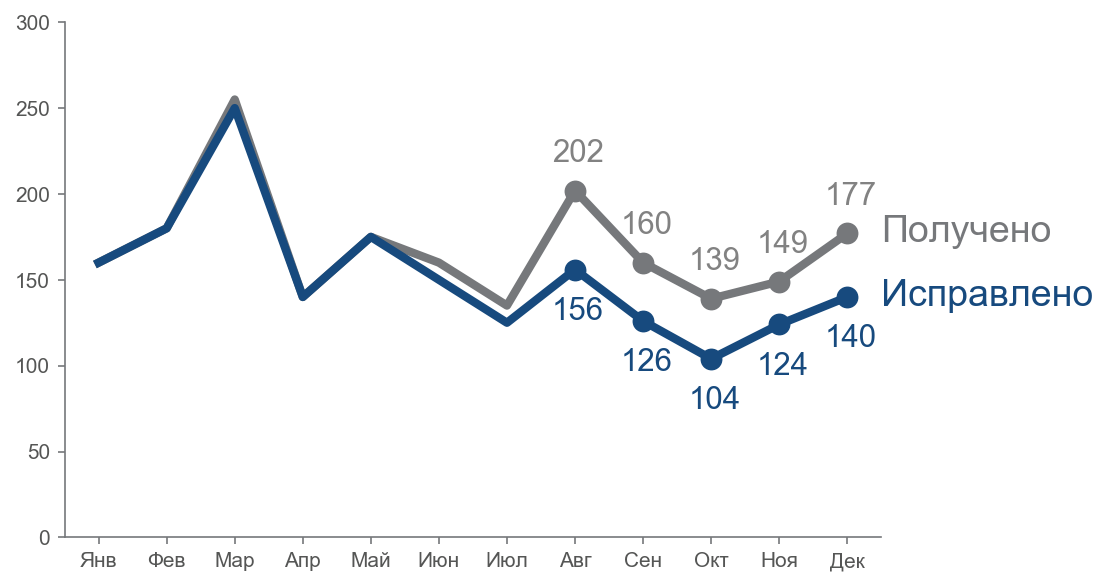

In [19]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, linewidth=4, color=GRAY5)
ax1.scatter(range(12)[-5:], Z[-5:], s=90, color=GRAY5)
ax1.plot(range(12), Y, linewidth=4, color=BLUE1)
ax1.scatter(range(12)[-5:], Y[-5:], s=90, color=BLUE1)
# annotate received
for i, v in enumerate(Z[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                    # (x,y) point to annotate
                 xytext=(-11, 14),            # (x,y) to place the text at
                 textcoords='offset points',  # offset (in points)
                 color=GRAY6,
                 fontsize=15)

# annotate proccessed
for i, v in enumerate(Y[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                   # (x,y) point to annotate
                 xytext=(-11, -24),          # (x,y) to place the text at
                 textcoords='offset points', # offset (in points)
                 color=BLUE1,
                 fontsize=15)
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X1,
         yticks=list(range(0, 350, 50)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(11.5, 172, 'Получено', fontsize=18, color=GRAY5)
ax1.text(11.5, 135, 'Исправлено', fontsize=18, color=BLUE1)
ax1.tick_params(color=GRAY5)
ax1.spines['left'].set_color(GRAY5)
ax1.spines['bottom'].set_color(GRAY5)
for item in ax1.get_xticklabels():
    item.set_color(GRAY3)
for item in ax1.get_yticklabels():
    item.set_color(GRAY3)
pass

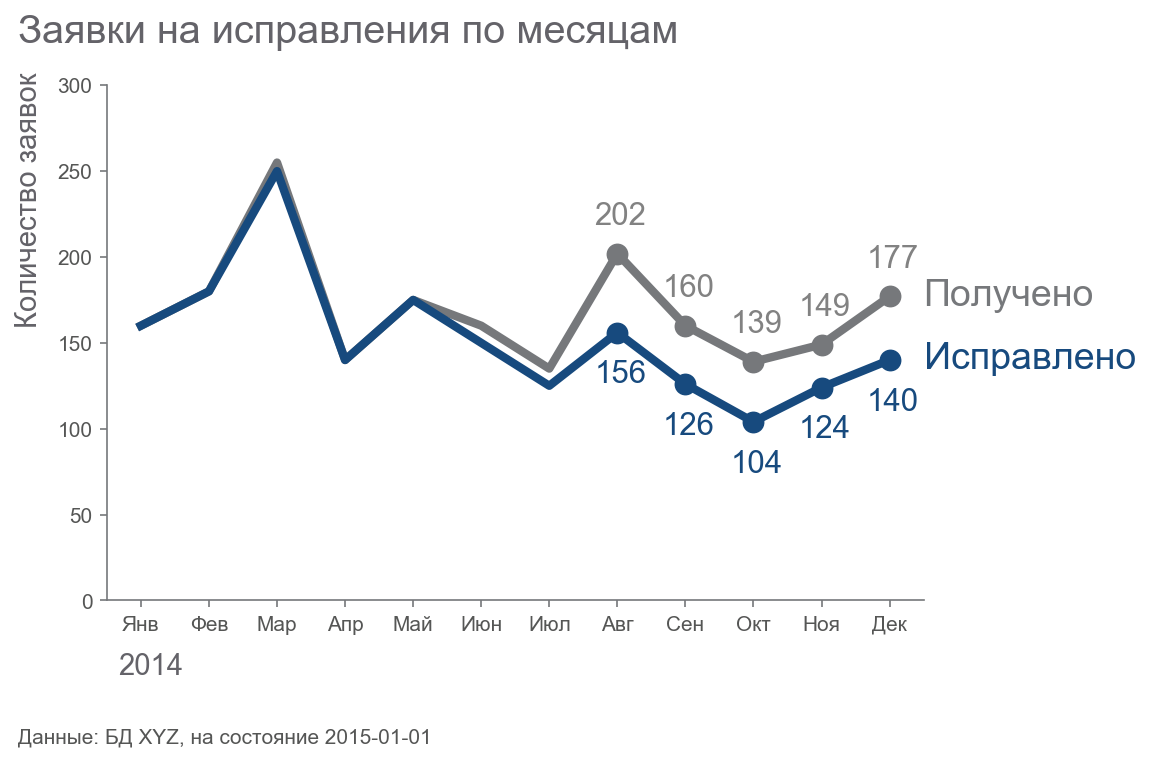

In [20]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, linewidth=4, color=GRAY5)
ax1.scatter(range(12)[-5:], Z[-5:], s=90, color=GRAY5)
ax1.plot(range(12), Y, linewidth=4, color=BLUE1)
ax1.scatter(range(12)[-5:], Y[-5:], s=90, color=BLUE1)
# annotate received
for i, v in enumerate(Z[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                    # (x,y) point to annotate
                 xytext=(-11, 14),            # (x,y) to place the text at
                 textcoords='offset points',  # offset (in points)
                 color=GRAY6,
                 fontsize=15)

# annotate proccessed
for i, v in enumerate(Y[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                   # (x,y) point to annotate
                 xytext=(-11, -24),          # (x,y) to place the text at
                 textcoords='offset points', # offset (in points)
                 color=BLUE1,
                 fontsize=15)
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X1,
         yticks=list(range(0, 350, 50)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(11.5, 172, 'Получено', fontsize=18, color=GRAY5)
ax1.text(11.5, 135, 'Исправлено', fontsize=18, color=BLUE1)
ax1.tick_params(color=GRAY5)
ax1.spines['left'].set_color(GRAY5)
ax1.spines['bottom'].set_color(GRAY5)
for item in ax1.get_xticklabels():
    item.set_color(GRAY3)
for item in ax1.get_yticklabels():
    item.set_color(GRAY3)

ax1.text(-1.80, 325, 'Заявки на исправления по месяцам', fontsize=19, color=GRAY4)
ax1.text(-1.85, 295, 'Количество заявок', fontsize=14, rotation='vertical',
         color=GRAY4)
ax1.text(-0.34, -43, '2014', fontsize=14, color=GRAY4)
ax1.text(-1.8, -83,
         'Данные: БД XYZ, на состояние 2015-01-01',
         fontsize=10, color=GRAY3, linespacing=1.3)
pass

C:\Python64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


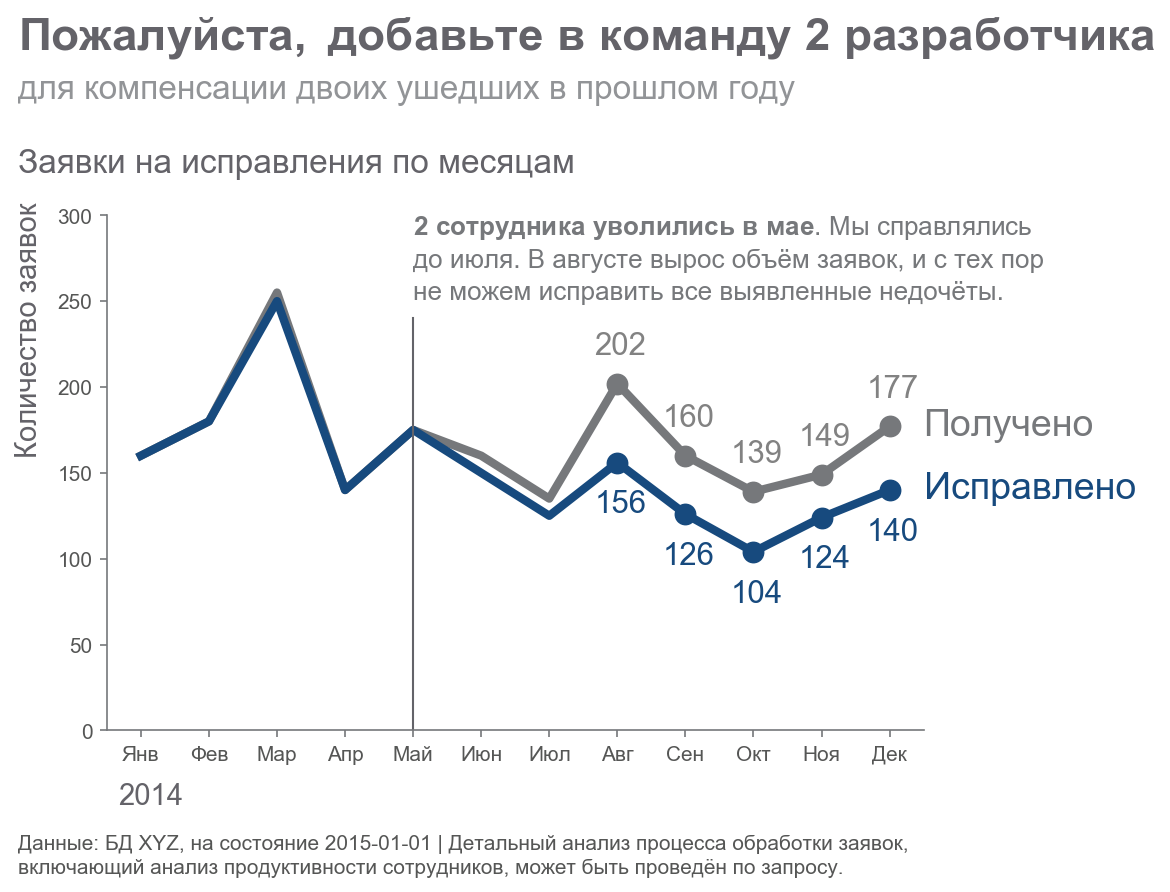

In [21]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, linewidth=4, color=GRAY5)
ax1.scatter(range(12)[-5:], Z[-5:], s=90, color=GRAY5)
ax1.plot(range(12), Y, linewidth=4, color=BLUE1)
ax1.scatter(range(12)[-5:], Y[-5:], s=90, color=BLUE1)
# annotate received
for i, v in enumerate(Z[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                    # (x,y) point to annotate
                 xytext=(-11, 14),            # (x,y) to place the text at
                 textcoords='offset points',  # offset (in points)
                 color=GRAY6,
                 fontsize=15)

# annotate proccessed
for i, v in enumerate(Y[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                   # (x,y) point to annotate
                 xytext=(-11, -24),          # (x,y) to place the text at
                 textcoords='offset points', # offset (in points)
                 color=BLUE1,
                 fontsize=15)
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X1,
         yticks=list(range(0, 350, 50)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(11.5, 172, 'Получено', fontsize=18, color=GRAY5)
ax1.text(11.5, 135, 'Исправлено', fontsize=18, color=BLUE1)
ax1.tick_params(color=GRAY5)
ax1.spines['left'].set_color(GRAY5)
ax1.spines['bottom'].set_color(GRAY5)
for item in ax1.get_xticklabels():
    item.set_color(GRAY3)
for item in ax1.get_yticklabels():
    item.set_color(GRAY3)

ax1.text(-1.80, 325, 'Заявки на исправления по месяцам', fontsize=16, color=GRAY4)
ax1.text(-1.85, 295, 'Количество заявок', fontsize=14, rotation='vertical',
         color=GRAY4)
ax1.text(-0.34, -43, '2014', fontsize=14, color=GRAY4)
ax1.text(-1.8, -83,
         'Данные: БД XYZ, на состояние 2015-01-01 | Детальный анализ процесса обработки заявок,\n'
         'включающий анализ продуктивности сотрудников, может быть проведён по запросу.',
         fontsize=10, color=GRAY3, linespacing=1.3)
ax1.text(-1.8, 397, '$\\bf{Пожалуйста,\ добавьте\ в\ команду\ 2\ разработчика}$',
         fontsize=22, color=GRAY4)
ax1.text(-1.8, 368, 'для компенсации двоих ушедших в прошлом году',
         fontsize=16, color=GRAY7)
ax1.text(4, 252,
         '$\\bf{2\ сотрудника\ уволились\ в\ мае}$. Мы справлялись\nдо июля. '
         'В августе вырос объём заявок, и с тех пор\nне можем исправить '
         'все выявленные недочёты.',
         fontsize=12.5, color=GRAY5, linespacing=1.4)
plt.axvline(x=4, ymax=0.8, color='#636369', linewidth=1)
pass

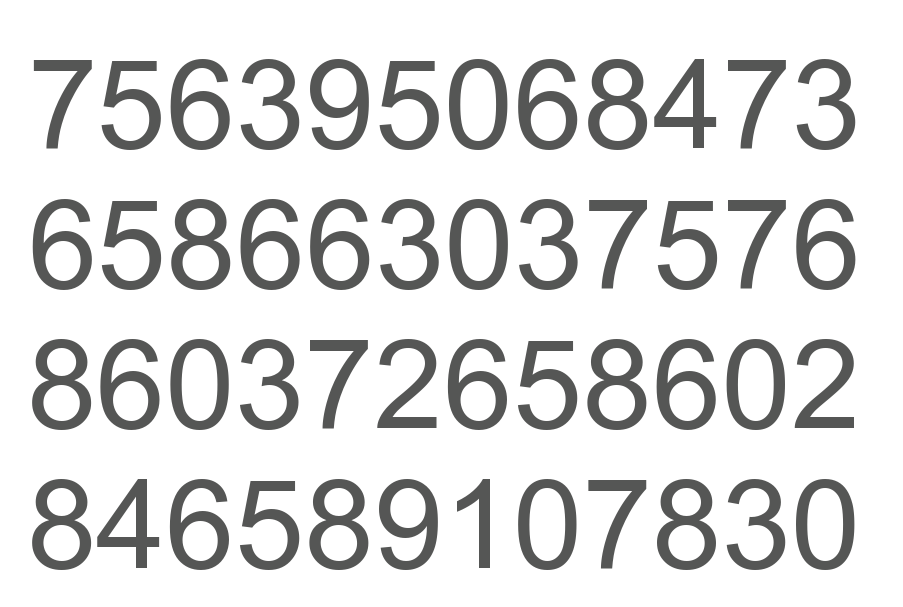

In [22]:
fig, ax = plt.subplots(figsize=(7.45, 4.9), dpi=150)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
rainbow_text(
    0.01, 0.01,
    '756395068473\n658663037576\n860372658602\n846589107830', 
    colors=[[GRAY3], [GRAY3], [GRAY3], [GRAY3]], ax=ax,
    fontsize=60, spacing=140)
pass

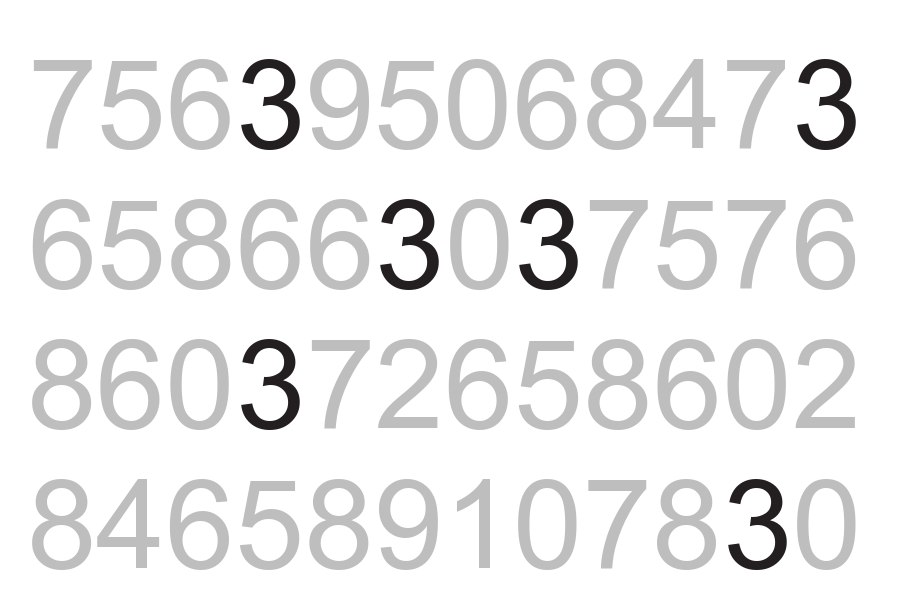

In [23]:
fig, ax = plt.subplots(figsize=(7.45, 4.9), dpi=150)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
rainbow_text(
    0.01, 0.01,
    '756||3||9506847||3\n65866||3||0||3||7576\n860||3||72658602\n8465891078||3||0', 
    colors=[
        [GRAY9, GRAY1, GRAY9, GRAY1],
        [GRAY9, GRAY1, GRAY9, GRAY1, GRAY9],
        [GRAY9, GRAY1, GRAY9],
        [GRAY9, GRAY1, GRAY9, GRAY1, GRAY9]], ax=ax,
    fontsize=60, spacing=140)
pass

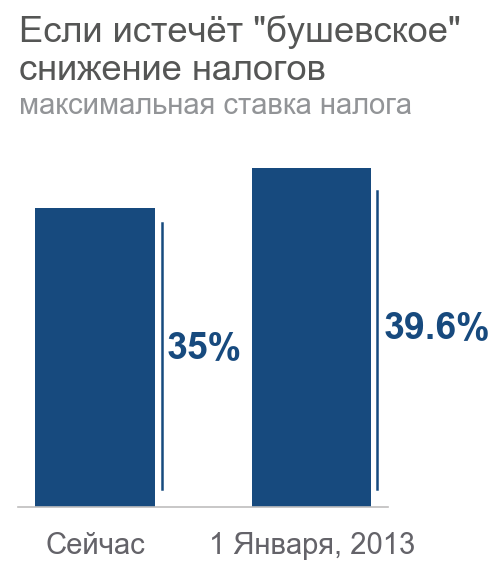

In [24]:
now, after = 35, 39.6
fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150)
fig.subplots_adjust(left=0.154, right=0.77, top=0.89, bottom=0.1)
bars = plt.bar([0, 1], [now, after],
               color=BLUE1,
               linewidth=0.5,
               width=0.55)
ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='on')

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.xticks([0, 1], ['Сейчас', '1 Января, 2013'])
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
ax1.spines['bottom'].set_color(GRAY9)
# title the plot
ax1.text(-0.35, 50, 'Если истечёт "бушевское"\nснижение налогов', color=GRAY3, 
         fontsize=17.4)
ax1.text(-0.35, 46, 'максимальная ставка налога', fontsize=14, color=GRAY7)
ax1.axvline(0.31, ymin=0.05, ymax=0.8, color=BLUE1, linewidth=1.2)
ax1.axvline(1.3, ymin=0.05, ymax=0.89, color=BLUE1, linewidth=1.2)
ax1.text(0.33, now/2, f'{now}%', fontweight='bold', fontsize=18, color=BLUE1)
ax1.text(1.33, after/2, f'{after}%', fontweight='bold', fontsize=18, color=BLUE1)
pass

C:\Python64\lib\site-packages\ipykernel\__main__.py:37: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


Text(1.33,41.5,'50%')

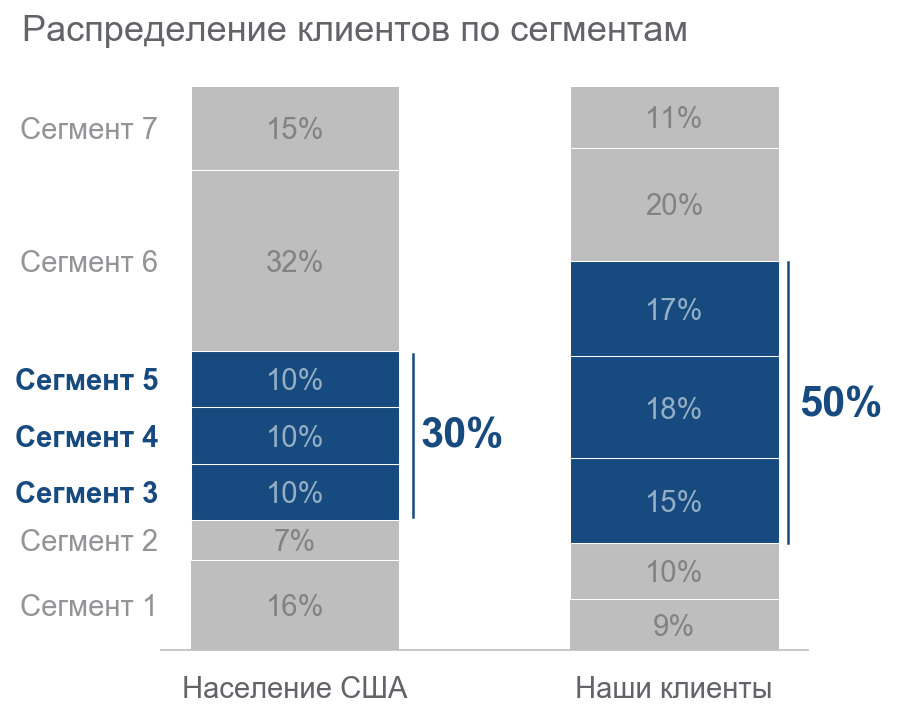

In [25]:
X = ['Сегмент ' + str(i) for i in range(1, 8)]
Y = [16, 7,  10, 10, 10, 32, 15] # US Population
Z = [9,  10, 15, 18, 17, 20, 11] # Our Customers

fig, ax1 = plt.subplots(figsize=(7, 5), dpi=150)

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.154, right=0.77, top=0.89, bottom=0.1)

# colors for bars drawing, numerical labeling and name labeling
C = [GRAY9] * 2 + [BLUE1] * 3 + [GRAY9] * 2
CT = [GRAY6] * 2 + [BLUE4] * 3 + [GRAY6] * 2
CL = [GRAY7] * 2 + [BLUE1] * 3 + [GRAY7] * 2

# draw stacked bars plot
bottom = np.array([0, 0])  # bottom accumulates starting points
for i in range(len(X)):
    bars = plt.bar([0, 1],
                   [Y[i], Z[i]],
                   bottom=bottom,  # for stacking
                   color=C[i],
                   # for white border
                   edgecolor=('white', 'none')[i == 0],
                   linewidth=0.5,
                   width=0.55)  # enlarge whitespace between

    ax1.text(-0.36,
             Y[i] / 2 + bottom[0] - 1.9,
             X[i],
             fontsize=14,
             horizontalalignment='right',
             color=CL[i],
             # use bold for blue color text
             fontweight=('normal', 'bold')[CL[i] == BLUE1])
    # add numerical data labels for each bar
    for bi, b in enumerate(bars):
        value = (Y[i], Z[i])[b.get_x() > 0]  # is it letf bar or right
        ax1.text(b.get_x() + b.get_width() / 2,  # x-center of bar
                 b.get_y() + b.get_height() / 2 - 1.9,  # y-center of bar
                 str(value) + '%',  # value with %
                 fontsize=14,
                 horizontalalignment='center',
                 color=CT[i])

    bottom += np.array([Y[i], Z[i]])

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='on')

# remove chart border
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# set category tick locations and labels of the x-axis
plt.xticks([0, 1], ['Население США', 'Наши клиенты'])

# configure responses labels appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# set bottom border color
ax1.spines['bottom'].set_color(GRAY9)

# title the plot
ax1.text(-0.72, 108, 'Распределение клиентов по сегментам', color=GRAY4, 
         fontsize=17.4)

# add vertical reference lines
ax1.axvline(0.31, ymin=0.225, ymax=0.5, color=BLUE1, linewidth=1.2)
ax1.axvline(1.3, ymin=0.18, ymax=0.655, color=BLUE1, linewidth=1.2)

# add text to reference lines
ax1.text(0.33, 36, '30%', fontweight='bold', fontsize=20, color=BLUE1)
ax1.text(1.33, 41.5, '50%', fontweight='bold', fontsize=20, color=BLUE1)

In [26]:
X = ['Функция ' + l for l in list('ABCDEFGHIJKLMNO')]
D = np.array([
    [0,  1, 1,  11, 40, 47],
    [0,  1, 2,  14, 36, 47],
    [2,  2, 5,  24, 34, 33],
    [8,  1, 4,  21, 37, 29],
    [6,  1, 6,  23, 36, 28],
    [14, 1, 5,  20, 35, 25],
    [19, 2, 5,  15, 26, 33],
    [13, 1, 6,  23, 32, 25],
    [22, 2, 5,  17, 27, 27],
    [2,  8, 14, 24, 27, 25],
    [29, 1, 4,  17, 28, 21],
    [29, 1, 4,  23, 27, 16],
    [33, 3, 8,  25, 18, 13],
    [26, 9, 14, 24, 17, 10],
    [51, 1, 6,  15, 16, 11]
])
colors = [
    [BLUE5]*14 + [BLUE6],
    [ORANGE2]*9 + [ORANGE3] + [ORANGE2]*3 + [ORANGE3] + [ORANGE2],
    [ORANGE2]*9 + [ORANGE3] + [ORANGE2]*3 + [ORANGE3] + [ORANGE2],
    [GRAY9]*15,
    [BLUE1]*2 + [BLUE3]*13,
    [BLUE1]*2 + [BLUE3]*13
]

In [27]:
def set_bar_pcnt(bar, val):
    plt.text(bar.get_x()+bar.get_width(), bar.get_y()+bar.get_height()-0.1,
             str(val)+'%  ',
             fontsize=10,
             horizontalalignment='right',
             color='white')    

Text(-20,16,'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".')

C:\Python64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


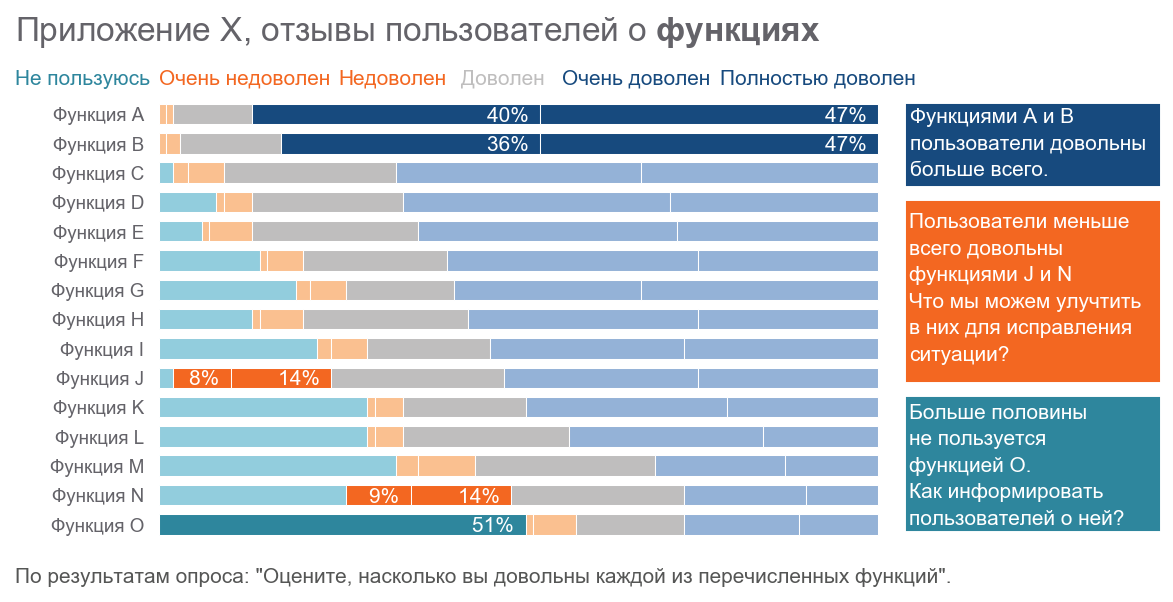

In [28]:
fig, ax1 = plt.subplots(figsize=(9.5, 4), dpi=150)
fig.subplots_adjust(left=0.155, right=0.685, top=0.89, bottom=0.1)

bottom = np.zeros(D.shape[0])
bars = []
for i in range(D.shape[1]):
    bars.append(
        plt.barh(
            range(D.shape[0]), 
            D[:, i], 
            left=bottom, 
            color=colors[i], 
            edgecolor='white', 
            linewidth=0.5, 
            height=0.7))
    bottom += D[:, i]
ax1.invert_yaxis()
rec = Rectangle((104, -0.29), 35, 2.7, fill=True, lw=1, color=BLUE1)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)

rec = Rectangle((104, 3), 35, 6.1, fill=True, lw=1, color=ORANGE3)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)

rec = Rectangle((104, 9.7), 35, 4.5, fill=True, lw=1, color=BLUE6)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)

ax1.tick_params(bottom=False, left=False, labelleft=True, labelbottom=False)
for spine in ax1.spines.values():
    spine.set_visible(False)
plt.yticks(range(len(X)), X)
for item in ax1.get_yticklabels():
    item.set_fontsize(9)
    item.set_color(GRAY4)
    
ax1.text(104.4, 2.1,
         'Функциями A и B\n'
         'пользователи довольны\n'
         'больше всего.',
         fontsize=10, color='white', linespacing=1.5)

ax1.text(104.3, 8.4,
         'Пользователи меньше\n'
         'всего довольны\n'
         'функциями J и N\n'
         'Что мы можем улучтить\n'
         'в них для исправления\n'
         'ситуации?',
         fontsize=10, color='white', linespacing=1.5)

ax1.text(104.3, 14,
         'Больше половины\n'
         'не пользуется\n'
         'функцией O.\n'
         'Как информировать\n'
         'пользователей о ней?',
         fontsize=10, color='white', linespacing=1.5)
for (i, j) in [(4, 0), (5, 0), (4, 1), (5, 1), (1, 9), (2, 9), (1, 13), (2, 13), (0, 14)]:
    set_bar_pcnt(bars[i][j], D[j, i])
ax1.text(-20, -1, 'Не пользуюсь', color=BLUE6)
ax1.text(0, -1, 'Очень недоволен', color=ORANGE3)
ax1.text(25, -1, 'Недоволен', color=ORANGE3)
ax1.text(42, -1, 'Доволен', color=GRAY9)
ax1.text(56, -1, 'Очень доволен', color=BLUE1)
ax1.text(78, -1, 'Полностью доволен', color=BLUE1)
ax1.text(-20, -2.5, 'Приложение X, отзывы пользователей о $\\bf{функциях}$', fontsize=16, color=GRAY4)
ax1.text(-20, 16,
         'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".',
         fontsize=10, color=GRAY3, linespacing=1.3)

Text(-20,16,'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".')

C:\Python64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


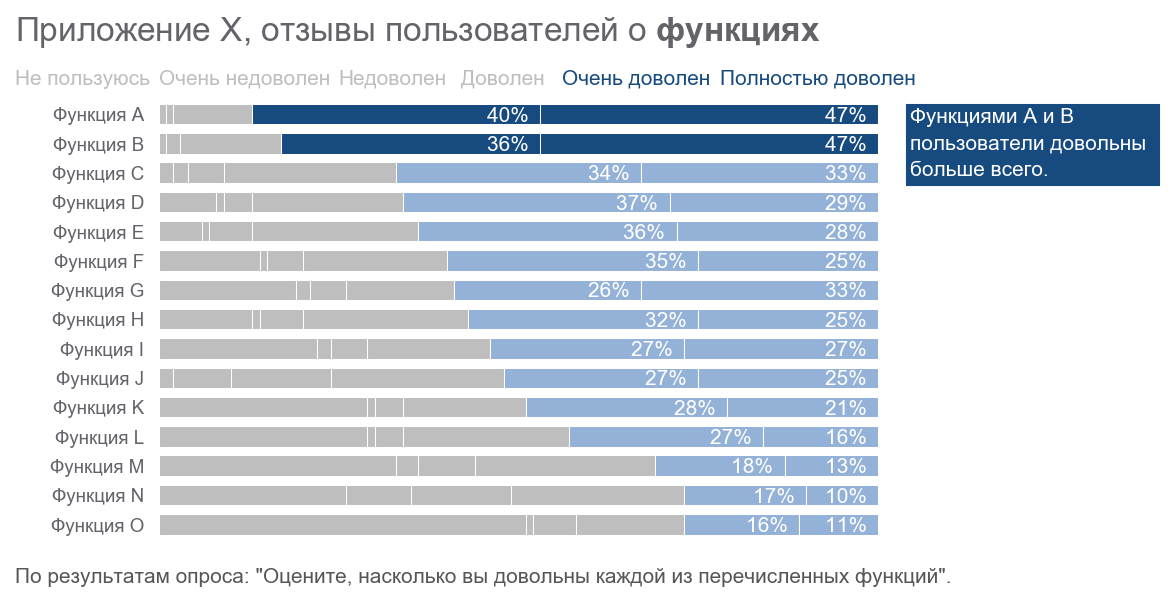

In [29]:
colors = [
    [GRAY9]*14 + [GRAY9],
    [GRAY9]*9 + [GRAY9] + [GRAY9]*3 + [GRAY9] + [GRAY9],
    [GRAY9]*9 + [GRAY9] + [GRAY9]*3 + [GRAY9] + [GRAY9],
    [GRAY9]*15,
    [BLUE1]*2 + [BLUE3]*13,
    [BLUE1]*2 + [BLUE3]*13
]
fig, ax1 = plt.subplots(figsize=(9.5, 4), dpi=150)
fig.subplots_adjust(left=0.155, right=0.685, top=0.89, bottom=0.1)

bottom = np.zeros(D.shape[0])
bars = []
for i in range(D.shape[1]):
    bars.append(
        plt.barh(
            range(D.shape[0]), 
            D[:, i], 
            left=bottom, 
            color=colors[i], 
            edgecolor='white', 
            linewidth=0.5, 
            height=0.7))
    bottom += D[:, i]
ax1.invert_yaxis()
rec = Rectangle((104, -0.29), 35, 2.7, fill=True, lw=1, color=BLUE1)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)

ax1.tick_params(bottom=False, left=False, labelleft=True, labelbottom=False)
for spine in ax1.spines.values():
    spine.set_visible(False)
plt.yticks(range(len(X)), X)
for item in ax1.get_yticklabels():
    item.set_fontsize(9)
    item.set_color(GRAY4)
    
ax1.text(104.4, 2.1,
         'Функциями A и B\n'
         'пользователи довольны\n'
         'больше всего.',
         fontsize=10, color='white', linespacing=1.5)
for j in range(D.shape[0]):
    for i in [4, 5]:
        set_bar_pcnt(bars[i][j], D[j, i])
ax1.text(-20, -1, 'Не пользуюсь', color=GRAY9)
ax1.text(0, -1, 'Очень недоволен', color=GRAY9)
ax1.text(25, -1, 'Недоволен', color=GRAY9)
ax1.text(42, -1, 'Доволен', color=GRAY9)
ax1.text(56, -1, 'Очень доволен', color=BLUE1)
ax1.text(78, -1, 'Полностью доволен', color=BLUE1)
ax1.text(-20, -2.5, 'Приложение X, отзывы пользователей о $\\bf{функциях}$', fontsize=16, color=GRAY4)
ax1.text(-20, 16,
         'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".',
         fontsize=10, color=GRAY3, linespacing=1.3)

Text(-20,16,'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".')

C:\Python64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


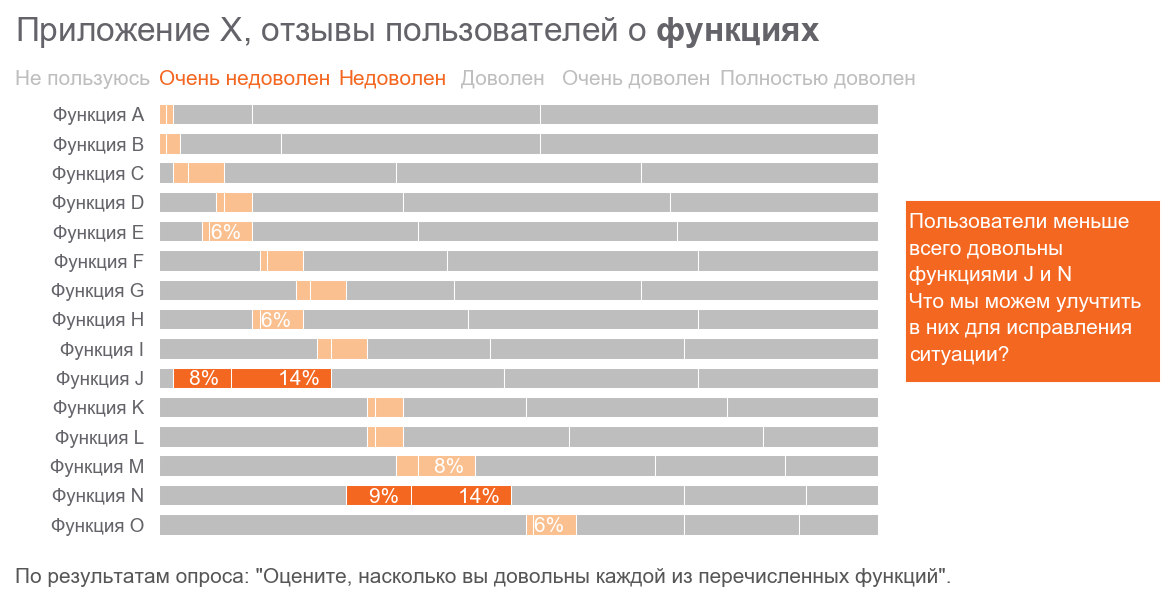

In [30]:
colors = [
    [GRAY9]*14 + [GRAY9],
    [ORANGE2]*9 + [ORANGE3] + [ORANGE2]*3 + [ORANGE3] + [ORANGE2],
    [ORANGE2]*9 + [ORANGE3] + [ORANGE2]*3 + [ORANGE3] + [ORANGE2],
    [GRAY9]*15,
    [GRAY9]*2 + [GRAY9]*13,
    [GRAY9]*2 + [GRAY9]*13
]

fig, ax1 = plt.subplots(figsize=(9.5, 4), dpi=150)
fig.subplots_adjust(left=0.155, right=0.685, top=0.89, bottom=0.1)

bottom = np.zeros(D.shape[0])
bars = []
for i in range(D.shape[1]):
    bars.append(
        plt.barh(
            range(D.shape[0]), 
            D[:, i], 
            left=bottom, 
            color=colors[i], 
            edgecolor='white', 
            linewidth=0.5, 
            height=0.7))
    bottom += D[:, i]
ax1.invert_yaxis()

rec = Rectangle((104, 3), 35, 6.1, fill=True, lw=1, color=ORANGE3)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)


ax1.tick_params(bottom=False, left=False, labelleft=True, labelbottom=False)
for spine in ax1.spines.values():
    spine.set_visible(False)
plt.yticks(range(len(X)), X)
for item in ax1.get_yticklabels():
    item.set_fontsize(9)
    item.set_color(GRAY4)
    

ax1.text(104.3, 8.4,
         'Пользователи меньше\n'
         'всего довольны\n'
         'функциями J и N\n'
         'Что мы можем улучтить\n'
         'в них для исправления\n'
         'ситуации?',
         fontsize=10, color='white', linespacing=1.5)
for j in range(D.shape[0]):
    for i in [1, 2]:
        if D[j, i] > 5:
            set_bar_pcnt(bars[i][j], D[j, i])

ax1.text(-20, -1, 'Не пользуюсь', color=GRAY9)
ax1.text(0, -1, 'Очень недоволен', color=ORANGE3)
ax1.text(25, -1, 'Недоволен', color=ORANGE3)
ax1.text(42, -1, 'Доволен', color=GRAY9)
ax1.text(56, -1, 'Очень доволен', color=GRAY9)
ax1.text(78, -1, 'Полностью доволен', color=GRAY9)
ax1.text(-20, -2.5, 'Приложение X, отзывы пользователей о $\\bf{функциях}$', fontsize=16, color=GRAY4)
ax1.text(-20, 16,
         'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".',
         fontsize=10, color=GRAY3, linespacing=1.3)

Text(-20,16,'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".')

C:\Python64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


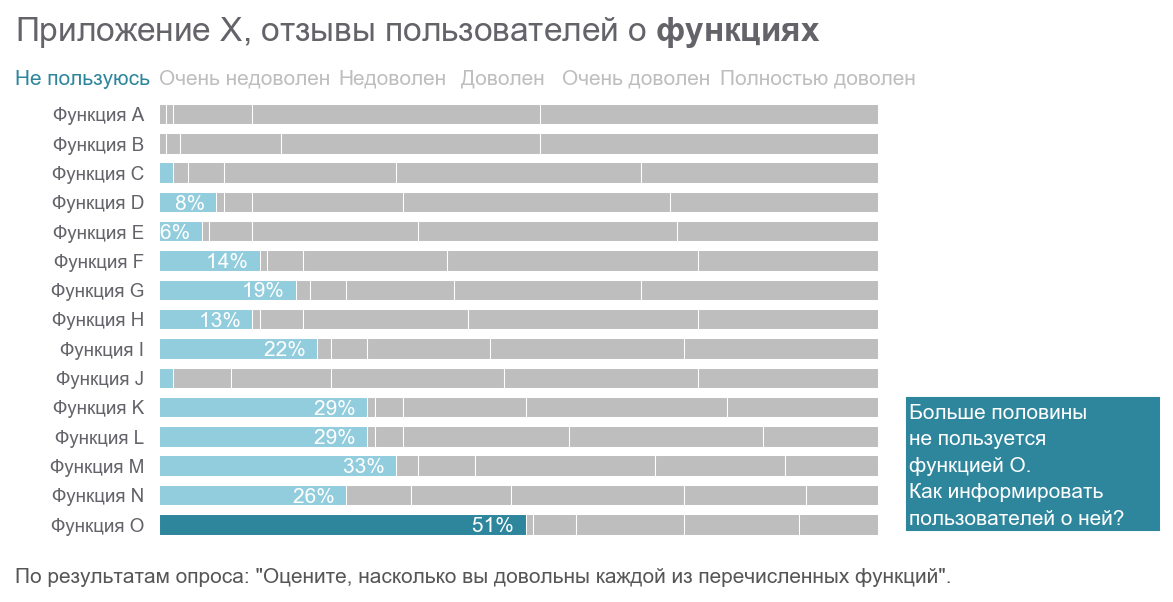

In [31]:
colors = [
    [BLUE5]*14 + [BLUE6],
    [GRAY9]*9 + [GRAY9] + [GRAY9]*3 + [GRAY9] + [GRAY9],
    [GRAY9]*9 + [GRAY9] + [GRAY9]*3 + [GRAY9] + [GRAY9],
    [GRAY9]*15,
    [GRAY9]*2 + [GRAY9]*13,
    [GRAY9]*2 + [GRAY9]*13
]

fig, ax1 = plt.subplots(figsize=(9.5, 4), dpi=150)
fig.subplots_adjust(left=0.155, right=0.685, top=0.89, bottom=0.1)

bottom = np.zeros(D.shape[0])
bars = []
for i in range(D.shape[1]):
    bars.append(
        plt.barh(
            range(D.shape[0]), 
            D[:, i], 
            left=bottom, 
            color=colors[i], 
            edgecolor='white', 
            linewidth=0.5, 
            height=0.7))
    bottom += D[:, i]
ax1.invert_yaxis()

rec = Rectangle((104, 9.7), 35, 4.5, fill=True, lw=1, color=BLUE6)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)

ax1.tick_params(bottom=False, left=False, labelleft=True, labelbottom=False)
for spine in ax1.spines.values():
    spine.set_visible(False)
plt.yticks(range(len(X)), X)
for item in ax1.get_yticklabels():
    item.set_fontsize(9)
    item.set_color(GRAY4)
    
ax1.text(104.3, 14,
         'Больше половины\n'
         'не пользуется\n'
         'функцией O.\n'
         'Как информировать\n'
         'пользователей о ней?',
         fontsize=10, color='white', linespacing=1.5)

for j in range(D.shape[0]):
    for i in [0]:
        if D[j, i] > 5:
            set_bar_pcnt(bars[i][j], D[j, i])

ax1.text(-20, -1, 'Не пользуюсь', color=BLUE6)
ax1.text(0, -1, 'Очень недоволен', color=GRAY9)
ax1.text(25, -1, 'Недоволен', color=GRAY9)
ax1.text(42, -1, 'Доволен', color=GRAY9)
ax1.text(56, -1, 'Очень доволен', color=GRAY9)
ax1.text(78, -1, 'Полностью доволен', color=GRAY9)
ax1.text(-20, -2.5, 'Приложение X, отзывы пользователей о $\\bf{функциях}$', fontsize=16, color=GRAY4)
ax1.text(-20, 16,
         'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".',
         fontsize=10, color=GRAY3, linespacing=1.3)

Text(55.6,1700,'По результатам опроса: "Оцените, насколько вы довольны новым автомобилем"... Основные претензии:\n... Чаще всего поломки... Среднее количество поломок на 1000 составляет...\n')

C:\Python64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


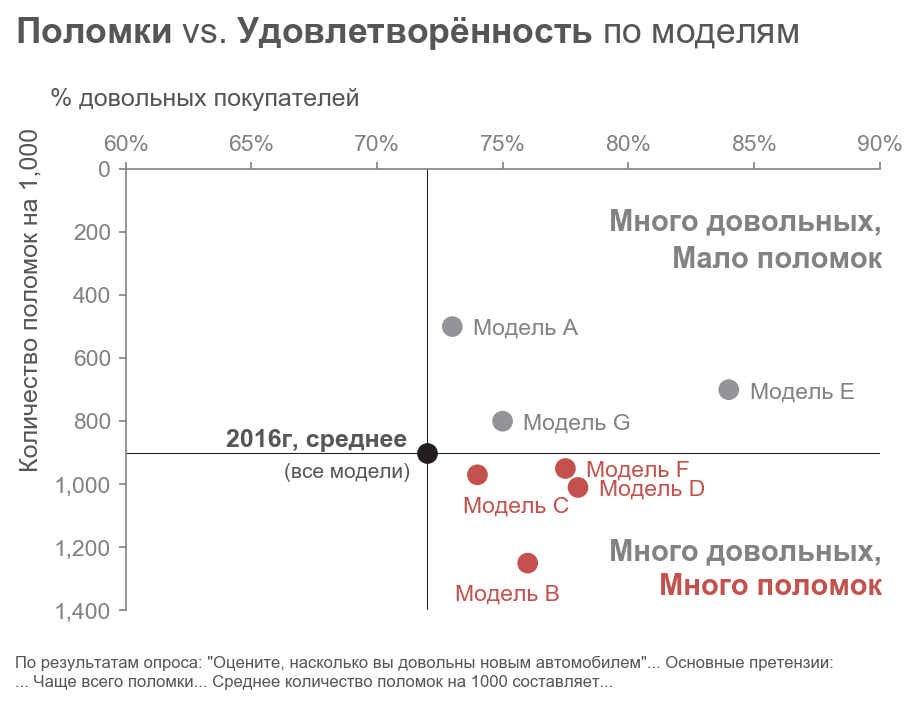

In [87]:
X = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Y = np.array([(73, 500), (76, 1250), (74, 970), (78, 1010),
              (84, 700), (77.5, 950), (75, 800)])

fig, ax1 = plt.subplots(figsize=(8.2, 5.4), dpi=150)
fig.subplots_adjust(left=0.262, right=0.875, top=0.605, bottom=0.06)
colors = [GRAY7, RED1, RED1, RED1, GRAY7, RED1, GRAY7]
ax1.scatter(Y[:, 0], Y[:, 1], color=colors, s=80)
txt_colors = [GRAY6, RED1, RED1, RED1, GRAY6, RED1, GRAY6]
offsets = [(10, -4), (-35, -18), (-7, -18), (10, -4), 
           (10, -4), (10, -4), (10, -4)]
for i, n in enumerate(X):
    ax1.annotate('Модель ' + n,
                 Y[i],
                 xytext=offsets[i],
                 textcoords='offset points',
                 color=txt_colors[i],
                 fontsize=11)

ax1.scatter([72], [900], color=GRAY1, s=80)
plt.axvline(x=72, color=GRAY1, linewidth=0.5)
plt.axhline(y=900, color=GRAY1, linewidth=0.5)
ax1.text(64, 880, '2016г, среднее', color=GRAY3, fontsize=12, 
         fontweight='bold')
ax1.text(66.3, 980, '(все модели)', color=GRAY3, fontsize=10)
ax1.set_xlim([60, 90])
ax1.set_ylim([0, 1400])

ax1.invert_yaxis()

xticks = list(range(60, 95, 5))
yticks = list(range(0, 1600, 200))
plt.setp(ax1,
         xticks=xticks,
         xticklabels=[str(i)+'%' for i in xticks],
         yticks=yticks)

ax1.tick_params(top='on', bottom='off', labelbottom='off', labeltop='on')
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(11)
    i.set_color(GRAY6)

ax1.tick_params(color=GRAY6)
ax1.spines['top'].set_color(GRAY6)
ax1.spines['left'].set_color(GRAY6)

ax1.text(55.8, -75, 'Количество поломок на 1,000', color=GRAY3, 
         rotation='vertical',  fontsize=12)
ax1.text(57, -200, '% довольных покупателей', color=GRAY3, 
         fontsize=12)

kw = {'fontweight': 'bold', 'horizontalalignment': 'right'}
ax1.text(90.1, 195, 'Много довольных,', fontsize=14, color=GRAY6, **kw) 
ax1.text(90.1, 315, 'Мало поломок', fontsize=14, color=GRAY6, **kw)
ax1.text(90.1, 1240, 'Много довольных,', fontsize=14, color=GRAY6, **kw)
ax1.text(90.1, 1350, 'Много поломок', fontsize=14, color=RED1, **kw)
ax1.text(55.6, -400, '$\\bf{Поломки}$ vs. $\\bf{Удовлетворённость}$ по моделям', color=GRAY3, fontsize=17)
ax1.text(55.6, 1700,
         'По результатам опроса: "Оцените, насколько вы довольны новым автомобилем"... Основные претензии:\n'
         '... Чаще всего поломки... Среднее количество поломок на 1000 составляет...\n'
         ,
         fontsize=8, color=GRAY3, linespacing=1.3)